In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) 

In [3]:
data = np.concatenate((X_train, X_test), axis=0)

In [4]:
label = np.concatenate((y_train, y_test), axis=0)

print('X_train.shape ', X_train.shape)

print('X_test.shape ',X_test.shape)

print('y_train.shape ',y_train.shape)

print('y_test.shape ',y_test.shape)

print("\n\nReview is ",X_train[0]) # series of no converted word to vocabulory associated with index
print("Review is ",y_train[0])

X_train.shape  (25000,)
X_test.shape  (25000,)
y_train.shape  (25000,)
y_test.shape  (25000,)


Review is  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 

In [5]:
vocab=imdb.get_word_index() # Retrieve the word index file mapping words to indices

In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [9]:
test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]

In [10]:
test_x.shape

(10000,)

In [11]:
test_y.shape

(10000,)

In [12]:
train_x.shape

(40000,)

In [13]:
train_y.shape

(40000,)

In [14]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [15]:
length = [len(i) for i in data]

print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


In [16]:
print("Label:", label[0])

print("Label:", label[1])

print(data[0])

Label: 1
Label: 0
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [17]:
index = imdb.get_word_index() # word to index

In [18]:
reverse_index = dict([(value, key) for (key, value) in index.items()]) # id to word
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )

print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

<AxesSubplot:xlabel='label', ylabel='count'>

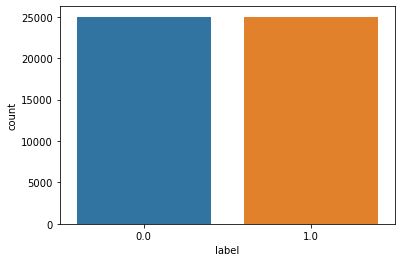

In [19]:
data = vectorize(data)
label = np.array(label).astype("float32")
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)

In [21]:
X_train.shape

(40000, 10000)

In [22]:
X_test.shape

(10000, 10000)

In [23]:
from keras.utils import to_categorical
from keras import models
from keras import layers

In [24]:
model = models.Sequential()

model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))

model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [25]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [26]:
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)


In [27]:
results = model.fit(
X_train, y_train,
epochs= 2,
batch_size = 500,
validation_data = (X_test, y_test),
callbacks=[callback]
)

Epoch 1/2
80/80 [==============================] - 32s 248ms/step - loss: 0.3932 - accuracy: 0.8264 - val_loss: 0.2634 - val_accuracy: 0.8956
Epoch 2/2
80/80 [==============================] - 10s 125ms/step - loss: 0.2163 - accuracy: 0.9171 - val_loss: 0.2584 - val_accuracy: 0.8988


In [28]:
print(np.mean(results.history["val_accuracy"]))

score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0.8972000181674957
20/20 [==============================] - 2s 79ms/step - loss: 0.2584 - accuracy: 0.8988
Test loss: 0.258360892534256
Test accuracy: 0.8988000154495239


In [29]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


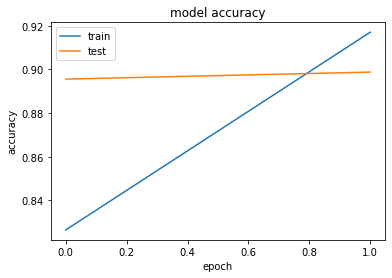

In [30]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

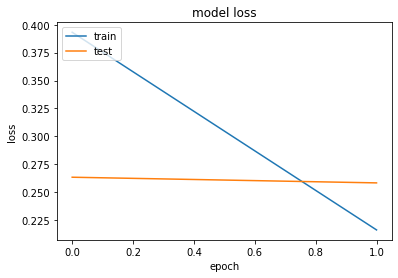

In [31]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()